<a href="https://colab.research.google.com/github/charle0911/2nd-ML100Days/blob/master/homework/Day71_%E4%BD%BF%E7%94%A8%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [0]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [0]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [31]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [33]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

In [0]:
#卷積層1

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#卷積層2與池化層2

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [48]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [49]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 118s 3ms/step - loss: 2.1636 - acc: 0.1981 - val_loss: 2.0466 - val_acc: 0.2974
Epoch 2/12
37500/37500 [==============================] - 118s 3ms/step - loss: 1.9537 - acc: 0.2967 - val_loss: 1.9292 - val_acc: 0.3490
Epoch 3/12
37500/37500 [==============================] - 118s 3ms/step - loss: 1.8322 - acc: 0.3457 - val_loss: 1.8351 - val_acc: 0.3828
Epoch 4/12
37500/37500 [==============================] - 118s 3ms/step - loss: 1.7303 - acc: 0.3810 - val_loss: 1.7431 - val_acc: 0.4176
Epoch 5/12
37500/37500 [==============================] - 118s 3ms/step - loss: 1.6505 - acc: 0.4102 - val_loss: 1.6760 - val_acc: 0.4388
Epoch 6/12
37500/37500 [==============================] - 118s 3ms/step - loss: 1.5869 - acc: 0.4302 - val_loss: 1.6437 - val_acc: 0.4531
Epoch 7/12
37500/37500 [==============================] - 118s 3ms/step - loss: 1.5321 - acc: 0.4527 - val_loss: 1.5806 - 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

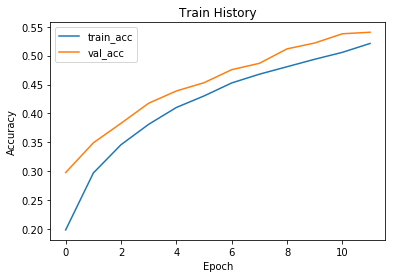

In [52]:
show_train_history('acc','val_acc')

In [53]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0606 - acc: 0.5319 - val_loss: 0.0628 - val_acc: 0.5504
Epoch 2/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.0604 - acc: 0.5333 - val_loss: 0.0627 - val_acc: 0.5503
Epoch 3/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0604 - acc: 0.5325 - val_loss: 0.0626 - val_acc: 0.5514
Epoch 4/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.0602 - acc: 0.5369 - val_loss: 0.0626 - val_acc: 0.5505
Epoch 5/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0601 - acc: 0.5360 - val_loss: 0.0624 - val_acc: 0.5531
Epoch 6/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0602 - acc: 0.5357 - val_loss: 0.0623 - val_acc: 0.5548
Epoch 7/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0602 - acc: 0.5351 - val_loss: 0.0624 - 

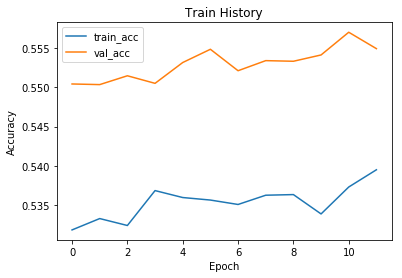

In [54]:
show_train_history('acc','val_acc')

In [55]:

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.2025 - acc: 0.9204 - val_loss: 0.2114 - val_acc: 0.9160
Epoch 2/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.2017 - acc: 0.9208 - val_loss: 0.2113 - val_acc: 0.9159
Epoch 3/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.2009 - acc: 0.9213 - val_loss: 0.2103 - val_acc: 0.9164
Epoch 4/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.2019 - acc: 0.9204 - val_loss: 0.2102 - val_acc: 0.9162
Epoch 5/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.2004 - acc: 0.9212 - val_loss: 0.2097 - val_acc: 0.9165
Epoch 6/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.2000 - acc: 0.9217 - val_loss: 0.2095 - val_acc: 0.9167
Epoch 7/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.1993 - acc: 0.9216 - val_loss: 0.2088 - 

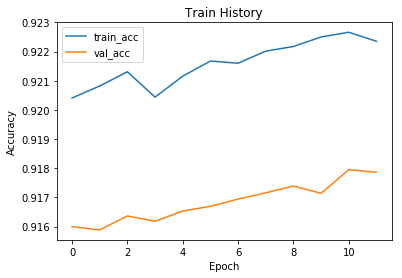

In [56]:
show_train_history('acc','val_acc')